In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Dataset of historical AT&T and Verizon stock prices from Alpha Vantage API

Before running this code mykey in all urls need to be replaced with api key. The api key is freely obtainable from https://www.alphavantage.co/ .

In [2]:
df_T = pd.read_csv(
"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=T&outputsize=full&apikey=mykey&datatype=csv",
parse_dates = ['timestamp'], 
index_col = 'timestamp')

In [3]:
df_T.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5779 entries, 2022-10-18 to 1999-11-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    5779 non-null   float64
 1   high    5779 non-null   float64
 2   low     5779 non-null   float64
 3   close   5779 non-null   float64
 4   volume  5779 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 270.9 KB


In [4]:
df_VZ = pd.read_csv(
"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=VZ&outputsize=full&apikey=mykey&datatype=csv",
parse_dates = ['timestamp'], 
index_col = 'timestamp')

In [5]:
df_VZ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5779 entries, 2022-10-18 to 1999-11-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    5779 non-null   float64
 1   high    5779 non-null   float64
 2   low     5779 non-null   float64
 3   close   5779 non-null   float64
 4   volume  5779 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 270.9 KB


Loading S&P 500 benchmark

In [6]:
df_sp500 = pd.read_csv(
"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SP&500&outputsize=full&apikey=mykey&datatype=csv",
parse_dates = ['timestamp'], 
index_col = 'timestamp')

In [7]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4628 entries, 2022-10-18 to 2004-06-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    4628 non-null   float64
 1   high    4628 non-null   float64
 2   low     4628 non-null   float64
 3   close   4628 non-null   float64
 4   volume  4628 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 216.9 KB


In [8]:
dataset = pd.concat([df_T.close,df_VZ.close],axis = 1,keys = ['T', 'VZ'])
dataset = dataset.sort_index().loc['2019-01-01':'2021-01-06']

In [9]:
dataset.head()

,T,VZ
timestamp,,
2019-01-02,29.54,56.02
2019-01-03,29.58,56.22
2019-01-04,30.34,56.36
2019-01-07,30.89,56.72
2019-01-08,31.28,58.38


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2019-01-02 to 2021-01-06
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       508 non-null    float64
 1   VZ      508 non-null    float64
dtypes: float64(2)
memory usage: 11.9 KB


#### Data Analysis steps:
- Visualize time series data of the two stocks
- Apply normalization to compare how the stocks perform relative to each other, and against a benchmark

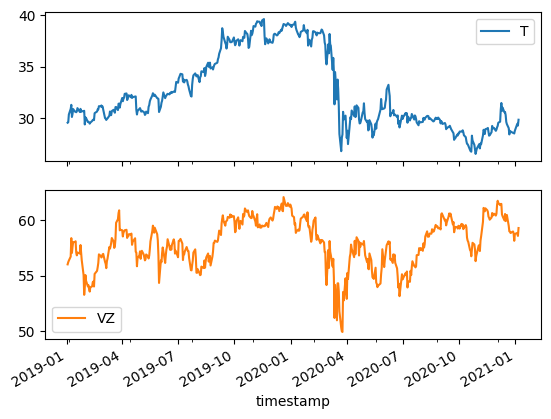

In [11]:
dataset.plot(subplots=True);

In [12]:
# Normalize data for comparison of stock growth rates
normalized = dataset.div(dataset.iloc[0]).mul(100)

In [13]:
normalized.head(3)

,T,VZ
timestamp,,
2019-01-02,100.000000,100.000000
2019-01-03,100.135410,100.357015
2019-01-04,102.708192,100.606926


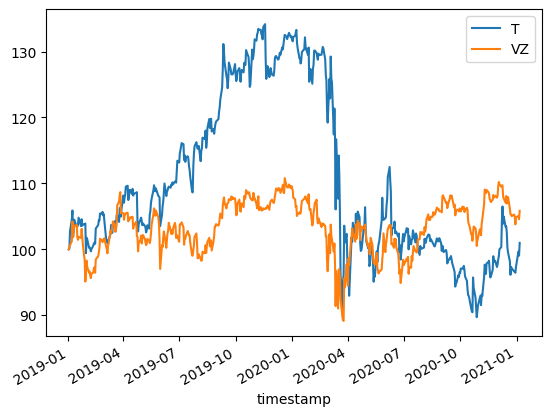

In [14]:
# Visualization of stock performance relative to each other
normalized.plot();

In [15]:
benchmark = df_sp500.sort_index().loc['2019-01-01':'2021-01-06']['close'].rename('SP500')

In [16]:
dataset = pd.concat([dataset,benchmark],axis = 1)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2019-01-02 to 2021-01-06
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       508 non-null    float64
 1   VZ      508 non-null    float64
 2   SP500   508 non-null    float64
dtypes: float64(3)
memory usage: 15.9 KB


In [18]:
# Normalize data for comparison of stock growth rates
normalized_bench = dataset.div(dataset.iloc[0]).mul(100)

In [19]:
normalized_bench.head(3)

,T,VZ,SP500
timestamp,,,
2019-01-02,100.000000,100.000000,100.000000
2019-01-03,100.135410,100.357015,97.186872
2019-01-04,102.708192,100.606926,100.133958


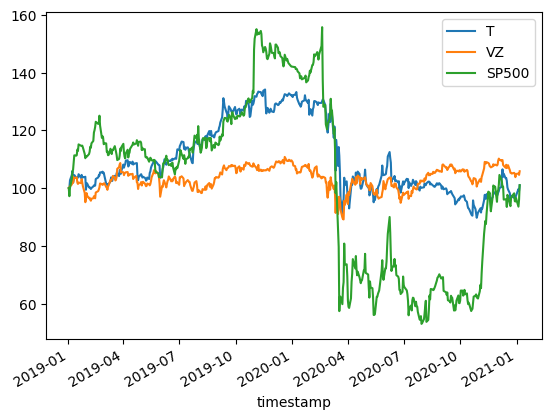

In [20]:
# Visualization of stock performances relative to a benchmark (SP500)
normalized_bench.plot();